# **Sea Surface Height Data**

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr

%matplotlib inline
import hvplot.xarray
import cartopy.crs as ccrs
import holoviews as hv
import geoviews as gv

from geoviews import opts, tile_sources as gvts

In [192]:
import sys
sys.tracebacklimit = 0

In [193]:
# url netcdf = 
ds = xr.open_dataset("dataset/ssh_data.nc")

In [194]:
ds.sla.hvplot.contour(groupby = "time", 
              clim = (-0.4, 0.4),
              widget_type="scrubber",
              widget_location="bottom",
              projection=ccrs.Mercator(
              min_latitude= 25, max_latitude=35,
              central_longitude = -76), 
             coastline='10m') + ds.sla.hvplot.contourf(groupby = "time", 
              clim = (-0.4, 0.4),
              widget_type="scrubber",
              widget_location="bottom",
              projection=ccrs.Mercator(
              min_latitude= 25, max_latitude=35,
              central_longitude = -76),
            coastline='10m', features = ["land"], cmap="RdBu", levels = 20)


Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=2223, width=550)
        [2] HSpacer()
    [2] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [3] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=2223, width=550)
        [2] HSpacer()

In [195]:
#ds.variables
import panel as pn
pn.extension()

## **Shark Data**

In [196]:
shark = pd.read_csv("dataset/track_shark144020.csv")

In [197]:
shark.head(4)

,lon,lat,datetime
0,-78.984392,27.187935,2014-11-15
1,-78.952825,27.172386,2014-11-16
2,-78.924598,27.156750,2014-11-17
3,-78.912462,27.146158,2014-11-18


In [198]:
# Check the min and max lat / lon

print("Min latitude: " + str(min(shark['lat'])))
print("Max latitude: " + str(max(shark['lat'])))
print("Min longitude: " + str(min(shark['lon'])))
print("Min longitude: " + str(max(shark['lon'])))

Min latitude: 26.44818354
Max latitude: 33.90428483
Min longitude: -80.06428163
Min longitude: -73.04951667


In [199]:
# get the sla values for each point of shark ...
# Testing ... 

# cols_df = ["sla", "ugos", "vgos", "ugosa", "vgosa"]

# sla_values = list()
# ugos_values = list()
# vgos_values = list()
# ugosa_values = list()
# vgosa_values = list()


# for day in range(len(shark)):
    
#     time_shark = shark["datetime"][day]
#     lat_shark = shark["lat"][day]
#     lon_shark = shark["lon"][day]
    
#     sla_point = ds.sel(time = time_shark, 
#                        longitude = lat_shark, 
#                        latitude = lon_shark,
#                        method = 'nearest')
    
#     sla_values.append(round(float(sla_point.sla.values),4))
#     ugos_values.append(round(float(sla_point.ugos.values),4))
#     vgos_values.append(round(float(sla_point.vgos.values),4))
#     ugosa_values.append(round(float(sla_point.ugosa.values),4))
#     vgosa_values.append(round(float(sla_point.vgosa.values),4))
    


# ssh_shark = pd.DataFrame({"sla_shark":sla_values,
#                          "ugos_shark":ugos_values,
#                          "vgos_shark":vgos_values,
#                          "ugosa_shark":ugosa_values,
#                          "vgosa_shark":vgosa_values})
    



In [200]:
# concat both dataframes into one

#final_shark_df = pd.merge(shark, ssh_shark, right_index = True, left_index = True)

In [201]:
#final_shark_df.to_csv("shark_and_ssh_match.csv")

In [202]:
#t = np.abs(sla_point.sla.latitude - lat_shark)

In [203]:
from hvplot import hvPlot
import holoviews as hv

In [204]:
import hvplot.pandas

In [205]:
shark.columns= ['longitude', 'latitude', 'time']

In [206]:
# shark to datetime 

shark['time'] = pd.to_datetime(shark['time'])

In [207]:
shark = shark.set_index("time")

In [208]:
# Gettint a subset to match with the period of shark
min_time_shark = min(shark.index)
max_time_shark = max(shark.index)

print(min_time_shark)
print(max_time_shark)

2014-11-15 00:00:00
2016-03-02 00:00:00


In [209]:
subset_time = (ds.sla.time >= min_time_shark) & (ds.sla.time <= max_time_shark)

In [210]:
shark_and_ssh = ds.where(subset_time, drop=True)

In [211]:
shark_and_ssh.dims

Frozen({'time': 474, 'latitude': 41, 'longitude': 48})

In [212]:
#shark_xr = shark.to_xarray()

In [213]:
#shark_xr#.transpose("time", "latitude", "longitude")

In [214]:
shark_and_ssh

<xarray.Dataset>
Dimensions:    (time: 474, latitude: 41, longitude: 48)
Coordinates:
  * time       (time) datetime64[ns] 2014-11-15 2014-11-16 ... 2016-03-02
  * latitude   (latitude) float32 25.12 25.38 25.62 25.88 ... 34.62 34.88 35.12
  * longitude  (longitude) float32 -81.88 -81.62 -81.38 ... -70.62 -70.38 -70.12
Data variables:
    adt        (time, latitude, longitude) float64 0.2903 0.2894 ... 0.9564
    ugos       (time, latitude, longitude) float64 -0.1326 -0.1113 ... -0.1307
    vgos       (time, latitude, longitude) float64 -0.1872 -0.1327 ... 0.0399
    vgosa      (time, latitude, longitude) float64 -0.205 -0.1089 ... 0.0325
    err        (time, latitude, longitude) float64 0.0232 0.0253 ... 0.0373
    sla        (time, latitude, longitude) float64 0.1273 0.1021 ... 0.168
    ugosa      (time, latitude, longitude) float64 -0.0451 -0.0132 ... -0.0101
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-06-03T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-06-03T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [215]:
# Trying to match both plots



plot = (shark_and_ssh.sla.hvplot.contourf(groupby="time",
              clim = (-0.4, 0.4),
            #  widget_type="scrubber",
            #  widget_location="bottom",
              projection=ccrs.Mercator(
              min_latitude= 25, max_latitude=35,
              central_longitude = -76,globe=None),
              coastline='10m', features = ["land"], 
              cmap='bwr', levels = 20, geo=True) * shark.hvplot.points('longitude', 'latitude', color='black',
                       projection=ccrs.Mercator(
              min_latitude= 25, max_latitude=35,
              central_longitude = -76,globe=None),
            geo=True,groupby="time"))

In [216]:
plot = plot.opts(title = "Sea Surface Height and Shark 1")

In [217]:
#shark['datetime'][0]

In [218]:
# shark.hvplot.points('lon', 'lat', color='red', alpha=0.2,
#                        projection=ccrs.Mercator(
#               min_latitude= 25, max_latitude=35,
#               central_longitude = -76), geo=True, groupby = "datetime")

In [219]:
# More Sharks
# load the datasets...
col_names = ['longitude', 'latitude', 'time']
# Shark Tag Data 
shark1 = pd.read_csv("dataset/track_shark144020.csv")
shark2 = pd.read_csv("dataset/track_shark137736.csv")
shark1.columns = col_names
shark2.columns = col_names
shark1['shark_number'] = '1'
shark2['shark_number'] = '2'
# concat dataframes
sharks = pd.concat([shark1, shark2])
sharks = sharks.reset_index(drop=True)
sharks['time'] = pd.to_datetime(sharks['time'])

In [220]:
osm = gv.tile_sources.OSM

In [221]:
gv_shark = gv.Dataset(sharks, kdims = ['longitude','latitude','time','shark_number'])
shark_gv = gv_shark.to(gv.Points, ['longitude','latitude'],['time'])

In [222]:
plot_points = (osm.opts(width = 600, height = 400) * shark_gv)
plot_points = plot_points.opts(opts.Points(width=500, height=400,tools=['hover'], color='black', size=4))

In [223]:
# shark.hvplot.points('lon', 'lat', color='red', alpha=0.2,
#                        xlim=(-80, -70), ylim=(0, 40), geo=True, groupby='datetime')

## Panel Dashboard

In [224]:
import panel as pn

In [225]:
# Customize Dashboard 
title = "# Xtractopy - Gulf Stream Edition"
logo = pn.panel('shark_logo.jpg', width = 300, align = 'start')
text = "Dataset: SSH + SST + CHL-a + Shark Tracking"

#header = pn.Row(pn.Column(title,
 #               pn.layout.Spacer(width=10), logo, pn.layout.HSpacer(), widgets)
# Header 
header_box = pn.WidgetBox(title, logo,pn.Column(text, width=400),
                         pn.layout.Spacer(margin = 400), text, width = 800, height = 200, align = 'center')

In [226]:
dashboard = pn.Column(pn.Row(header_box),
                   pn.Column(plot))

Column
    [0] Row
        [0] WidgetBox(align='center', height=200, sizing_mode='fixed', width=800)
            [0] Markdown(str)
            [1] JPG(str, width=300)
            [2] Column(width=400)
                [0] Markdown(str)
            [3] Spacer(margin=400)
            [4] Markdown(str)
    [1] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] DiscreteSlider(margin=(20, 20, 5, 20), name='time', options=OrderedDict([('2014-11-15 ...]), value=numpy.datetime64('2014-11-..., width=250)
                    [1] DiscreteSlider(margin=(5, 20, 20, 20), name='Time', options=OrderedDict([('2014-11-15 ...]), value=numpy.datetime64('2014-11-..., width=250)
                [1] VSpacer()
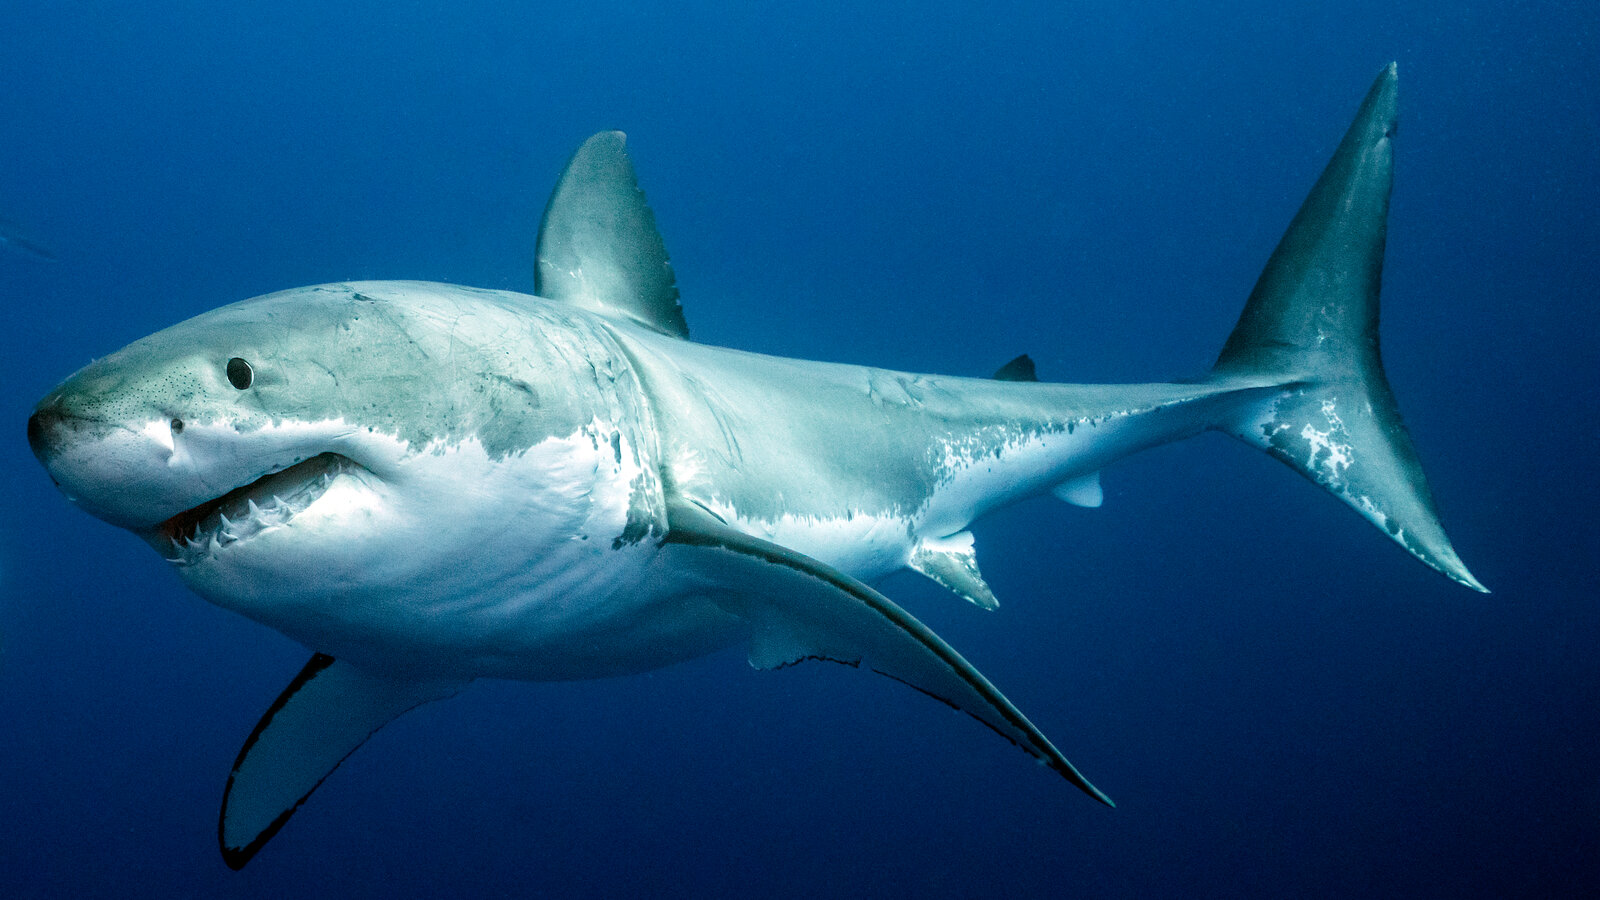

In [227]:
dashboard

In [228]:
plot_points.opts(title = "Shark History Track")

:HoloMap   [shark_number]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [longitude,latitude]   (time)